# Импортируем библиотеки

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import ParameterGrid

from sklearn.metrics import roc_auc_score

from sklearn.preprocessing import FunctionTransformer

from catboost import CatBoostClassifier

import warnings
warnings.filterwarnings('ignore')

# Загружаем данные

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
submission_data = pd.read_csv('submission.csv')

In [3]:
print(f'размер тренировочной выборки: {train_data.shape}')
train_data.head()

размер тренировочной выборки: (5282, 20)


,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0


In [4]:
print(f'размер тестовой выборки: {test_data.shape}')
test_data.head()

размер тестовой выборки: (1761, 19)


,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod
0,42,56.10,2386.85,Male,0,Yes,No,Yes,Yes,DSL,Yes,No,No,No,No,No,One year,No,Credit card (automatic)
1,29,98.50,3004.15,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check
2,9,76.25,684.85,Male,0,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
3,67,74.00,4868.4,Female,0,Yes,Yes,Yes,Yes,DSL,Yes,Yes,No,Yes,Yes,No,Two year,No,Credit card (automatic)
4,71,20.10,1389.6,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic)


In [5]:
print(f'размер примера: {submission_data.shape}')
submission_data.head()

размер примера: (1761, 2)


,Id,Churn
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5


Еще посмотрим на случайные строки, т.к. это было в задании :D

In [6]:
train_data.sample(5)# смотрим на 5 случайных строк

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
3496,24,64.35,1558.65,Female,0,Yes,Yes,Yes,Yes,DSL,Yes,Yes,Yes,No,No,No,Two year,No,Electronic check,0
3703,67,94.35,6341.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,No,No,Yes,No,Yes,One year,Yes,Credit card (automatic),1
4982,56,68.75,3808,Female,0,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,No,No,Yes,One year,Yes,Bank transfer (automatic),0
3074,22,48.80,1054.6,Female,0,No,No,Yes,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),1
2705,48,78.90,3771.5,Male,0,No,No,Yes,No,DSL,No,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0


# Разведочный анализ данных

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

Мы видим, что фича `TotalSpent` попадет в категориальные признаки, однако, невооруженным глазом можно увидеть, что это фича относится к числовым признакам. Давайте исправим это. Удалять пропущенные значения мы не будем, а заменим их медианными значениями.

In [8]:
# 1. Замена пробелов на NaN
train_data['TotalSpent'] = train_data['TotalSpent'].replace(' ', pd.NA)

# 2. Преобразование столбца в числовой формат
train_data['TotalSpent'] = pd.to_numeric(train_data['TotalSpent'], errors='coerce')

# 3. Заполнение пропусков медианным значением
median_value = train_data['TotalSpent'].median()
train_data['TotalSpent'].fillna(median_value, inplace=True)

# Проверяем тип данных столбца TotalSpent и наличие пропусков
train_data['TotalSpent'].dtype, train_data['TotalSpent'].isnull().sum()

(dtype('float64'), 0)

Сделаем тоже самое сразу и для тесового набора данных

In [9]:
# 1. Замена пробелов на NaN
test_data['TotalSpent'] = test_data['TotalSpent'].replace(' ', pd.NA)

# 2. Преобразование столбца в числовой формат
test_data['TotalSpent'] = pd.to_numeric(test_data['TotalSpent'], errors='coerce')

# 3. Заполнение пропусков медианным значением
median_value = test_data['TotalSpent'].median()
test_data['TotalSpent'].fillna(median_value, inplace=True)

# Проверяем тип данных столбца TotalSpent и наличие пропусков
test_data['TotalSpent'].dtype, test_data['TotalSpent'].isnull().sum()

(dtype('float64'), 0)

In [10]:
def missing_data(df):
    # Считаем общее количество пропусков для каждого столбца
    total = df.isnull().sum().sort_values(ascending=False)
    
    # Считаем процент пропусков для каждого столбца
    percent = (df.isnull().sum() / df.isnull().count() * 100).sort_values(ascending=False)
    
    # Создаем датафрейм с информацией о пропусках
    missing_data = pd.DataFrame({'Пропуски (%)': percent,
                                 'Количество пропусков': total})
    return missing_data

missing_data(train_data)

,Пропуски (%),Количество пропусков
ClientPeriod,0.0,0
MonthlySpending,0.0,0
PaymentMethod,0.0,0
IsBillingPaperless,0.0,0
HasContractPhone,0.0,0
HasMovieSubscription,0.0,0
HasOnlineTV,0.0,0
HasTechSupportAccess,0.0,0
HasDeviceProtection,0.0,0
HasOnlineBackup,0.0,0


In [11]:
missing_data(test_data)

,Пропуски (%),Количество пропусков
ClientPeriod,0.0,0
HasOnlineSecurityService,0.0,0
IsBillingPaperless,0.0,0
HasContractPhone,0.0,0
HasMovieSubscription,0.0,0
HasOnlineTV,0.0,0
HasTechSupportAccess,0.0,0
HasDeviceProtection,0.0,0
HasOnlineBackup,0.0,0
HasInternetService,0.0,0


Мы видим, что пропусков в тренировочном и тестовых наборах данных у нас нет.

In [12]:
# Определение численных и категориальных признаков
numeric_features = train_data.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_features = [col for col in train_data.columns if col not in numeric_features]

# Убираем целевую переменную из списка численных признаков
numeric_features.remove('Churn')

print(f'численные признаки: \n{numeric_features}')
print('-'*125)
print(f'категориальные признаки: \n{categorical_features}')

численные признаки: 
['ClientPeriod', 'MonthlySpending', 'TotalSpent', 'IsSeniorCitizen']
-----------------------------------------------------------------------------------------------------------------------------
категориальные признаки: 
['Sex', 'HasPartner', 'HasChild', 'HasPhoneService', 'HasMultiplePhoneNumbers', 'HasInternetService', 'HasOnlineSecurityService', 'HasOnlineBackup', 'HasDeviceProtection', 'HasTechSupportAccess', 'HasOnlineTV', 'HasMovieSubscription', 'HasContractPhone', 'IsBillingPaperless', 'PaymentMethod']


Обратим внимание и на тот факт, что столбец `IsSeniorCitizen` отнесен сейчас к числовым признакам, однако эта бинарная классификация больше относится к категориальным признакам. Вероятнее всего он означает является ли человек пожилым или нет, давайте отнесем его к категориальным признакам.

In [13]:
# Перемещение 'IsSeniorCitizen' из списка численных признаков в список категориальных
if 'IsSeniorCitizen' in numeric_features:
    numeric_features.remove('IsSeniorCitizen')
    categorical_features.append('IsSeniorCitizen')

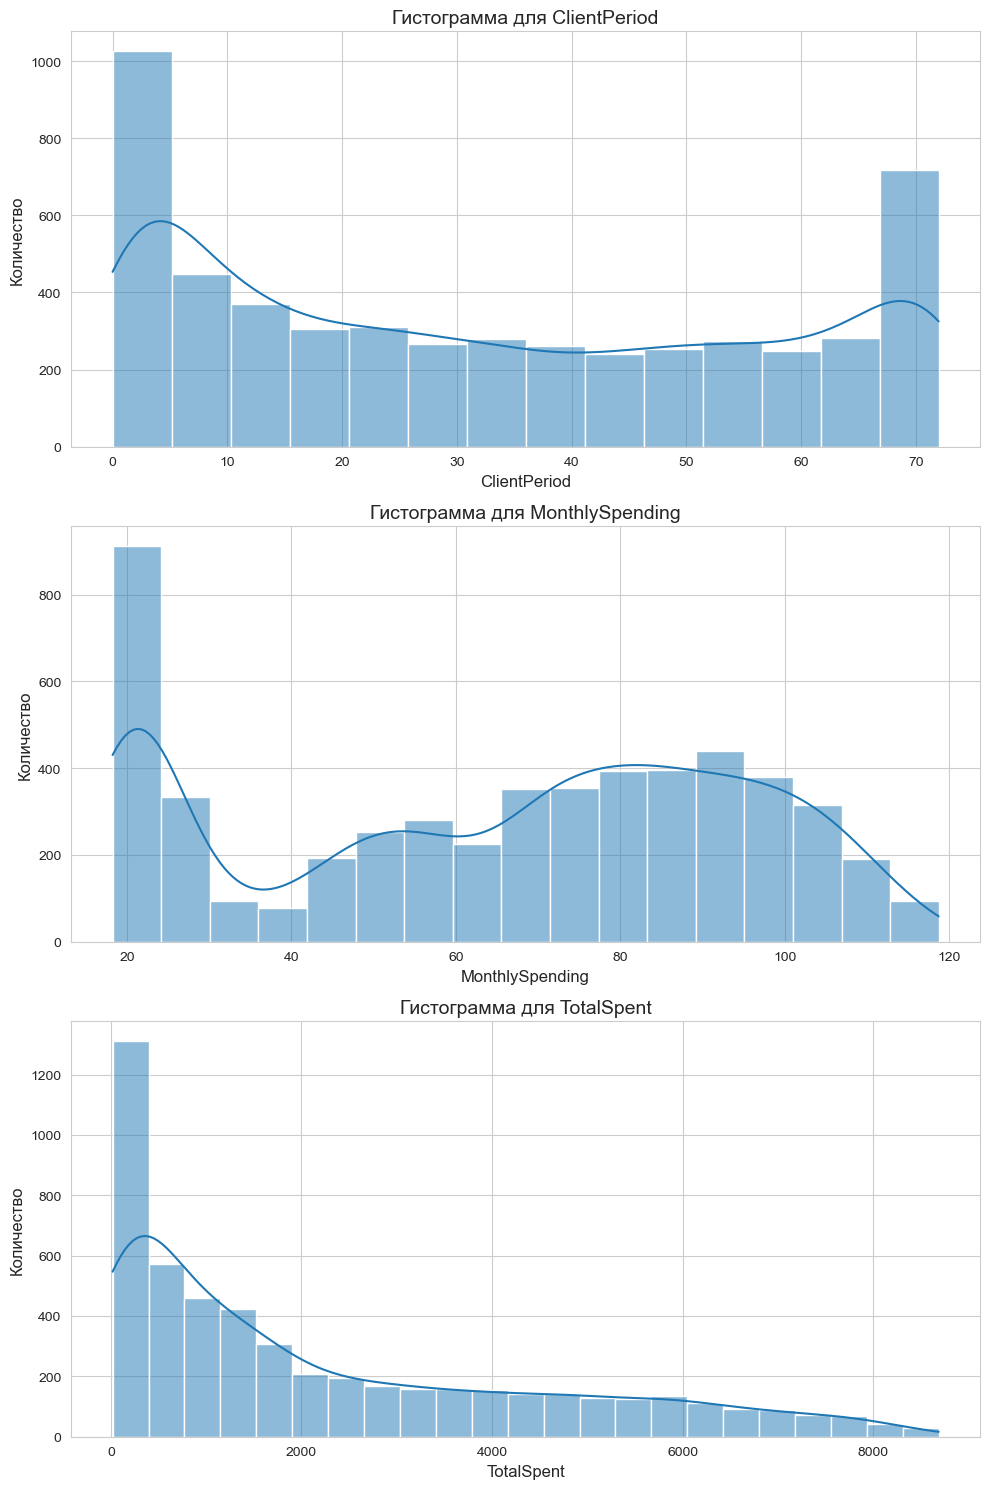

In [14]:
# Настройка стиля графиков
sns.set_style('whitegrid')

# Инициализация рисунка
fig, ax = plt.subplots(nrows=len(numeric_features), ncols=1, figsize=(10, 15))

# Построение гистограмм для численных признаков
for i, col in enumerate(numeric_features):
    sns.histplot(train_data[col], ax=ax[i], kde=True)
    ax[i].set_title(f'Гистограмма для {col}', fontsize=14)
    ax[i].set_xlabel(col, fontsize=12)
    ax[i].set_ylabel('Количество', fontsize=12)

plt.tight_layout()
plt.show()

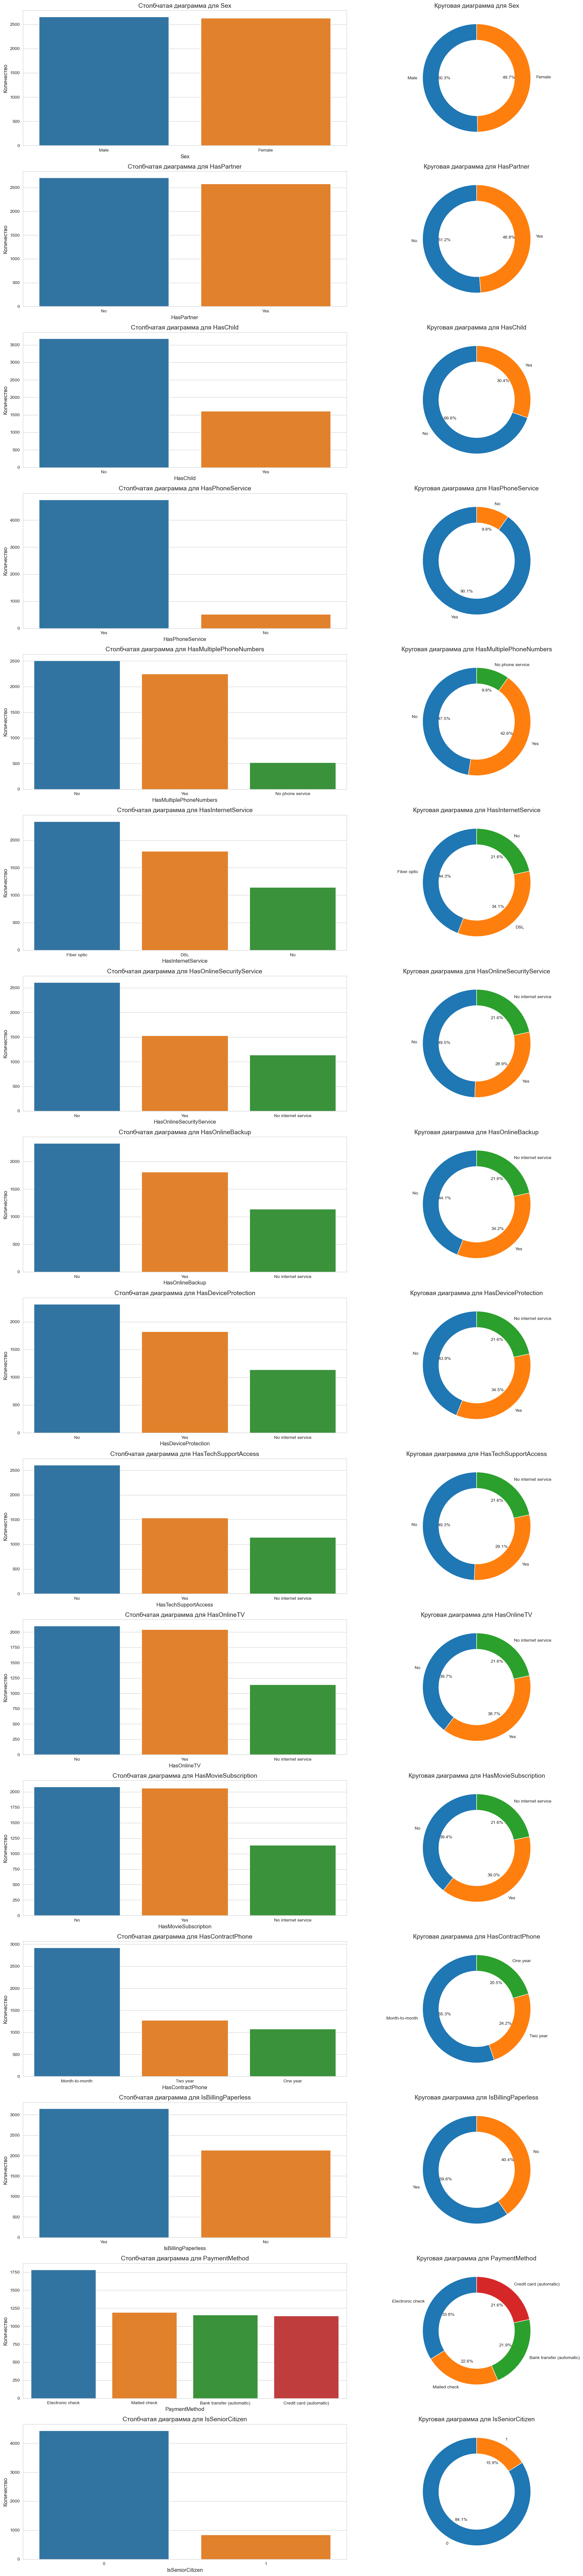

In [15]:
# Инициализация рисунка для категориальных признаков
fig, ax = plt.subplots(nrows=len(categorical_features), ncols=2, figsize=(20, 80))

# Построение столбчатых и круговых диаграмм для категориальных признаков
for i, col in enumerate(categorical_features):
    value_counts = train_data[col].value_counts()
    
    # Столбчатая диаграмма
    sns.barplot(x=value_counts.index, y=value_counts.values, ax=ax[i, 0])
    ax[i, 0].set_title(f'Столбчатая диаграмма для {col}', fontsize=14)
    ax[i, 0].set_xlabel(col, fontsize=12)
    ax[i, 0].set_ylabel('Количество', fontsize=12)
    
    # Круговая диаграмма с процентами
    ax[i, 1].pie(value_counts.values, labels=value_counts.index, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.3))
    ax[i, 1].set_title(f'Круговая диаграмма для {col}', fontsize=14)

plt.tight_layout()
plt.show()

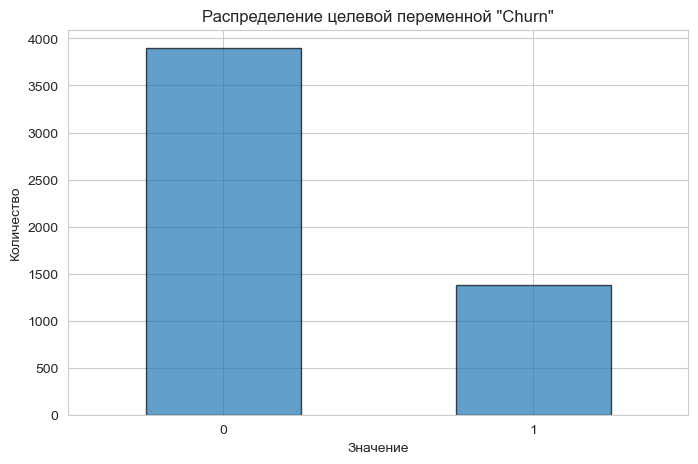

(Churn
 0    3898
 1    1384
 Name: count, dtype: int64,
 Churn
 0    73.797804
 1    26.202196
 Name: count, dtype: float64)

In [16]:
# Подсчет распределения целевой переменной
churn_counts = train_data['Churn'].value_counts()

# Построение столбчатой диаграммы
plt.figure(figsize=(8, 5))
churn_counts.plot(kind='bar', alpha=0.7, edgecolor='black')
plt.title('Распределение целевой переменной "Churn"')
plt.xlabel('Значение')
plt.ylabel('Количество')
plt.xticks(rotation=0)
plt.show()

churn_counts, churn_counts / len(train_data) * 100

Из столбчатой диаграммы и числовых данных видно, что:

- Примерно 73.8% клиентов (3898 человек) не ушли (Churn = 0).
- Примерно 26.2% клиентов (1384 человека) ушли (Churn = 1).

Таким образом, классы являются несбалансированными, так как большая часть данных относится к классу клиентов, которые не ушли. Несбалансированность классов может привести к тому, что модель будет менее чувствительной к классу с меньшим количеством примеров. В таких случаях может потребоваться применение различных методов для учета дисбаланса классов при обучении модели. Бороться с этим можно разными методами: 
- Over-sampling
- Under-sampling 
- Class Weighting
- Использование в моделях метрик: ROC-AUC или F1 score

Т.к. в рамках задания от нас требуется использовать метрики ROC-AUC, то мы и воспользуемся этим методом!

# Предобработка данных:

In [17]:
def preprocess_pipeline(df, numeric_features, categorical_features):
    """
    Функция для предобработки данных: нормализация численных признаков и one-hot-encoding категориальных.
    """
    # Нормализация численных признаков
    numeric_transformer = Pipeline(steps=[
        ('scaler', StandardScaler())
    ])

    # One-hot-encoding для категориальных признаков
    categorical_transformer = Pipeline(steps=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])

    # Объединение обработчиков признаков
    preprocessor_local = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),
            ('cat', categorical_transformer, categorical_features)
        ])

    # Применение преобразований к данным
    data_preprocessed = preprocessor_local.fit_transform(df)

    # Получение новых названий столбцов после one-hot-encoding
    encoded_features_local = preprocessor_local.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features)

    # Объединение названий всех столбцов
    all_features_local = numeric_features + encoded_features_local.tolist()

    return pd.DataFrame(data_preprocessed, columns=all_features_local)

train_data_preprocessed_check = preprocess_pipeline(train_data, numeric_features, categorical_features)
train_data_preprocessed_check.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex_Female,Sex_Male,HasPartner_No,HasPartner_Yes,HasChild_No,HasChild_Yes,HasPhoneService_No,...,HasContractPhone_One year,HasContractPhone_Two year,IsBillingPaperless_No,IsBillingPaperless_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,IsSeniorCitizen_0,IsSeniorCitizen_1
0,0.920767,-1.505447,-0.557323,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,1.613288,-1.294998,-0.184235,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,-1.279005,0.363737,-0.976549,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,-0.016173,0.476418,0.123552,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,1.124450,1.667856,1.970998,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


Делаем тоже самое для тестового набора данных:

In [18]:
test_data_preprocessed_check = preprocess_pipeline(test_data, numeric_features, categorical_features)
test_data_preprocessed_check.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex_Female,Sex_Male,HasPartner_No,HasPartner_Yes,HasChild_No,HasChild_Yes,HasPhoneService_No,...,HasContractPhone_One year,HasContractPhone_Two year,IsBillingPaperless_No,IsBillingPaperless_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,IsSeniorCitizen_0,IsSeniorCitizen_1
0,0.394782,-0.274027,0.057033,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,-0.133958,1.147644,0.330322,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,-0.947404,0.401602,-0.696470,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,1.411590,0.326160,1.155656,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,1.574279,-1.481107,-0.384465,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [19]:
# Разделение на features и target
X_train = train_data_preprocessed_check
y_train = train_data['Churn']

In [20]:
# Разделение данных на тренировочный и валидационный наборы
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

X_train_split.shape, X_val.shape, y_train_split.shape, y_val.shape

((3697, 46), (1585, 46), (3697,), (1585,))

# Строим логистическую регрессию

In [21]:
# Определяем функцию, которая преобразует DataFrame в numpy массив
def preprocess_pipeline_np(df, numeric_features, categorical_features):
    processed_data = preprocess_pipeline(df, numeric_features, categorical_features)
    return processed_data.values

# Создаем новый pipeline, включающий preprocess_pipeline_np
pipeline_with_custom_preprocessing = make_pipeline(
    FunctionTransformer(preprocess_pipeline_np, kw_args={'numeric_features': numeric_features, 'categorical_features': categorical_features}),
    LogisticRegression(solver='liblinear', random_state=42)
)

# Список значений гиперпараметра C для тестирования
param_grid = {
    'logisticregression__C': [100, 10, 1, 0.1, 0.01, 0.001]
}

# Применяем GridSearchCV, как и ранее
grid_search_custom = GridSearchCV(pipeline_with_custom_preprocessing, param_grid, scoring='roc_auc', cv=5, refit=True)
grid_search_custom.fit(train_data.drop(columns='Churn'), train_data['Churn'])

# Лучший параметр C и соответствующий ему ROC-AUC для нового pipeline
best_C_custom = grid_search_custom.best_params_['logisticregression__C']
best_score_custom = grid_search_custom.best_score_

print(f'Лучший параметр С: {best_C_custom}')
print(f'ROC-AUC тренировочной выборки: {round(best_score_custom, 2)}')

Лучший параметр С: 100
ROC-AUC тренировочной выборки: 0.85


Лучшее качество ROC-AUC = 0.85 и оно было получено с лучшим параметром С = 100

In [22]:
# Преобразуем тестовые данные
test_data_preprocessed = preprocess_pipeline(test_data, numeric_features, categorical_features)

# Посмотрим на столбцы в предобработанных тренировочных данных
train_columns = set(train_data_preprocessed_check.columns)

# Посмотрим на столбцы в предобработанных тестовых данных
test_columns = set(test_data_preprocessed.columns)

# Найдем отличающиеся столбцы
missing_in_train = test_columns - train_columns
missing_in_test = train_columns - test_columns

missing_in_train, missing_in_test

(set(), set())

In [23]:
# Применяем лучшую модель к тестовой выборке для получения вероятностей принадлежности к классу 1
predicted_probabilities = grid_search_custom.best_estimator_.predict_proba(test_data)[:, 1]

# Получаем бинарные предсказания
predicted_labels = grid_search_custom.best_estimator_.predict(test_data)

In [24]:
# Формируем датафрейм для предсказаний на основе submission_data
submission_df_lr = submission_data.copy()
submission_df_lr['Churn'] = predicted_probabilities

submission_df_lr.head()

# Сохраняем в csv
submission_df_lr.to_csv('submission_df_lr.csv', index=False)

# Строим модель на catboosting

**Шаг 1**: Начнем с обучения модели catboost со стандартными параметрами.

In [25]:
X_train.columns.tolist()

['ClientPeriod',
 'MonthlySpending',
 'TotalSpent',
 'Sex_Female',
 'Sex_Male',
 'HasPartner_No',
 'HasPartner_Yes',
 'HasChild_No',
 'HasChild_Yes',
 'HasPhoneService_No',
 'HasPhoneService_Yes',
 'HasMultiplePhoneNumbers_No',
 'HasMultiplePhoneNumbers_No phone service',
 'HasMultiplePhoneNumbers_Yes',
 'HasInternetService_DSL',
 'HasInternetService_Fiber optic',
 'HasInternetService_No',
 'HasOnlineSecurityService_No',
 'HasOnlineSecurityService_No internet service',
 'HasOnlineSecurityService_Yes',
 'HasOnlineBackup_No',
 'HasOnlineBackup_No internet service',
 'HasOnlineBackup_Yes',
 'HasDeviceProtection_No',
 'HasDeviceProtection_No internet service',
 'HasDeviceProtection_Yes',
 'HasTechSupportAccess_No',
 'HasTechSupportAccess_No internet service',
 'HasTechSupportAccess_Yes',
 'HasOnlineTV_No',
 'HasOnlineTV_No internet service',
 'HasOnlineTV_Yes',
 'HasMovieSubscription_No',
 'HasMovieSubscription_No internet service',
 'HasMovieSubscription_Yes',
 'HasContractPhone_Month-to-

In [26]:
# Используем исходные данные (до преобразования)
X_train_orig = train_data.drop(columns='Churn')
y_train_orig = train_data['Churn']

# Разделяем на тренировочные и валидационные наборы
X_train_split_orig, X_val_orig, y_train_split_orig, y_val_orig = train_test_split(X_train_orig, y_train_orig, test_size=0.3, random_state=42)

# Создаем экземпляр модели CatBoost
catboost_model_default = CatBoostClassifier(verbose=0, cat_features=categorical_features)

# Обучаем модель
catboost_model_default.fit(X_train_split_orig, y_train_split_orig)

# Получаем предсказания на валидационной выборке
predictions_default = catboost_model_default.predict_proba(X_val_orig)[:, 1]

# Вычисляем ROC-AUC
roc_auc_default = roc_auc_score(y_val, predictions_default)
print(f"ROC-AUC со стандартными параметрами: {round(roc_auc_default, 2)}")

ROC-AUC со стандартными параметрами: 0.83


### Подбираем гипперпараметры

In [27]:
# Задаем сетку параметров для тестирования
param_grid = {
    'iterations': [100, 500, 1000],
    'learning_rate': [0.01, 0.05, 0.1]
}

best_score = 0
best_params = {}

# Проходим по всем комбинациям параметров
for params in ParameterGrid(param_grid):
    model = CatBoostClassifier(**params, verbose=0, cat_features=categorical_features)
    model.fit(X_train_split_orig, y_train_split_orig)  # Используем исходные данные
    predictions = model.predict_proba(X_val_orig)[:, 1]  # Используем исходные данные
    score = roc_auc_score(y_val_orig, predictions)
    if score > best_score:
        best_score = score
        best_params = params

print(f"Лучший ROC-AUC: {round(best_score, 2)}")
print(f"Лучшие параметры: {best_params}")

Лучший ROC-AUC: 0.84
Лучшие параметры: {'iterations': 500, 'learning_rate': 0.01}


Лучшее качество ROC-AUC = 0.84 и оно было получено с лучшимb параметрами iterations = 500, learning_rate = 0.01

In [28]:
# Обучаем модель CatBoost с лучшими параметрами на полной тренировочной выборке
best_model = CatBoostClassifier(**best_params, verbose=0, cat_features=categorical_features)
best_model.fit(X_train_orig, y_train_orig)

# Применяем лучшую модель к тестовой выборке для получения вероятностей принадлежности к классу 1
predicted_probabilities_catboost = best_model.predict_proba(test_data)[:, 1]

# Формируем датафрейм для предсказаний на основе submission_data
submission_df_catboost = submission_data.copy()
submission_df_catboost['Churn'] = predicted_probabilities_catboost

# Сохраняем в csv
submission_df_catboost.to_csv('submission_df_catboost.csv', index=False)